# FUNDAMENTALS OF DATA SCIENCE (771766 ) PROJECT

# Project Background
-The dataset consists of information of taken during a census of the population in United Kingdom with the purpose of 
comparing different people across the nation and for the government to make informed decisions using with accurate statistics of
the population to enable better planning, to develop policies, and to allocate certain funding. 
The goal of this report is to clean and analyse the mock census data provided and make decisions on what to do with an 
unoccupied plot of land and what to invest in. 

# Step 1: Importing libraries

-Mock Census Data is Census06.csv

In [1]:
#csv library is imported
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', None)

# Step 2: Importing the dataset

In [3]:
#census06 is read
census06= pd.read_csv('census06.csv')
census06

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,NaN,Female,Child,None,NaN


# Step 3: Exploratoy Data Analysis
Description of Census06 dataset

In [4]:
type(census06)

pandas.core.frame.DataFrame

- As expected, it is a DataFrame 

In [5]:
#check the dimension
census06.shape

(8329, 11)

- My census06 csv file is made up of 8329 rows and 11 columns

In [6]:
#check the summary 
census06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [7]:
#This displays the first 5 rows
census06.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None


- This displays the first 5 rows and gives a good idea of the dataset

In [8]:
#This displays the last 5 rows
census06.tail()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,NaN,Female,Child,None,NaN
8328,1,Poole Stronghold,Carol,Thomas,24,Sibling,Single,Female,"Administrator, charities/voluntary organisations",None,Christian


In [9]:
#This displays the column names
census06.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

- All the 11 columns headings are appropriate and human-readable.

In [10]:
#This shows the kind of data it contains
census06.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

- All values in the columns have the same type (object) for instance, surname, Gender etc which implies as string except House Number which is int64, a type of integer. Unexpectedly, cells in the Age column do not have integer or float value and is also taken as object.

In [11]:
#check the statistics of each column
census06.describe(include = 'all')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,8329.000000,8329,8329,8329,8329,8329,6273,8329,8329,8329,6224
unique,NaN,105,365,654,127,23,5,2,1058,8,10
top,NaN,Wessex Drive,Geoffrey,Smith,40,Head,Single,Female,Student,None,None
freq,NaN,793,36,262,168,2824,2941,4302,1669,8261,2800
mean,29.340737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,35.744848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Most people in the dataset are Females
- The most occuring Relationship is Head
- A large portion of the town population are students
- Most of the people are 40 years


# Step 3: Data Cleaning and Preparation

- This involves Data cleaning which is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset

# (i) Finding duplicated data

In [12]:
#check any duplicated
census06.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8324    False
8325    False
8326    False
8327    False
8328    False
Length: 8329, dtype: bool

In [13]:
#if any duplicated, this shows the number of duplicated values
census06.duplicated().sum()

0

- There are no duplicated data in the census06 dataset.

# (ii) Finding missing values 

In [14]:
#This checks for missing values
census06.isnull().any()

House Number                     False
Street                           False
First Name                       False
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                        False
Religion                          True
dtype: bool

- Marital Status and Religion columns have missing data

In [15]:
#this shows the number of missing values
census06.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2056
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

- There are 2,056 missing data in Marital Status while there are 2,105 missing data in Religion. 

In [16]:
#this calculates the percentage of Nan
census06.isnull().sum()/census06.shape[0]

House Number                     0.000000
Street                           0.000000
First Name                       0.000000
Surname                          0.000000
Age                              0.000000
Relationship to Head of House    0.000000
Marital Status                   0.246848
Gender                           0.000000
Occupation                       0.000000
Infirmity                        0.000000
Religion                         0.252731
dtype: float64

- Approximately 25% of the data in Marital Status and Religion have NaN

# (iii) Finding blank cells

In [17]:
#This displays the rows that have blank cell '' in Age column
census06[census06["Age"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,,Son,Single,Male,University Student,None,Christian


-This displays 2 blank cells in Age column 

In [18]:
#This displays the rows that have blank cell '' in Marital Status column
census06[census06["Marital Status"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,,Male,University Student,None,Christian


- There are 3 blank cells in Marital Status column

In [19]:
#This displays the rows that have blank cell '' in Religion column
census06[census06["Religion"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,None,
6456,1,Gibbs Lane,Donna,Mitchell,85,Head,Divorced,Female,Retired Fast food restaurant manager,None,
6824,53,July Isle,Leon,Marshall,23,None,Single,Male,"Programmer, multimedia",None,
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",None,


- There are 4 blank cells in Religion

In [20]:
#This displays the rows that have blank cell '' in Infirmity column
census06[census06["Infirmity"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
344,29,Gold Road,Joanna,Francis,65,Head,Single,Female,Clothing/textile technologist,,Christian
462,13,Peninsula Drive,Lucy,Graham-Rogers,0,Daughter,NaN,Female,Child,,NaN
1284,182,Wessex Drive,Susan,Mills,50,Head,Single,Female,International aid/development worker,,Christian
1587,9,Charity Road,Stewart,Brown,3,Son,NaN,Male,Child,,NaN
1630,18,Charity Road,Jade,Holmes,50,Head,Married,Female,Amenity horticulturist,,None
1665,22,Charity Road,Adrian,Turner,6,Son,NaN,Male,Student,,NaN
7030,8,Naylor Crescent,Olivia,Porter,22,Head,Single,Female,University Student,,None
8101,54,Kestrel Flat,Elizabeth,Singh,43,Head,Married,Female,Trading standards officer,,Christian


- There are 8 blank cells in Infirmity column

In [21]:
#This displays the rows that have blank cell '' in Surname column
census06[census06["Surname"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,,8,Son,NaN,Male,Student,None,NaN


- There is 1 blank cell in Surname column

In [22]:
#This displays the rows that have blank cell '' in First name column
census06[census06["First Name"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


- There is 1 blank cell in the First name column

In [23]:
#This displays the rows that have blank cell '' in Street column
census06[census06["Street"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [24]:
#This displays the rows that have blank cell '' in Relationship to Head of house column
census06[census06["Relationship to Head of House"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [25]:
#This displays the rows that have blank cell '' in Occupation column
census06[census06["Occupation"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [26]:
#This displays the rows that have blank cell '' in Gender column
census06[census06["Gender"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [27]:
#This displays the rows that have blank cell '' in House Number column
census06[census06["House Number"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- In the Census06 dataset, only the columns listed below have blank cell
- Age - 2
- Marital Status - 3
- Religion - 4
- Infirmity - 8
- Surname - 1
- First Name - 1

# Checking the distribution

<Figure size 64x48 with 0 Axes>

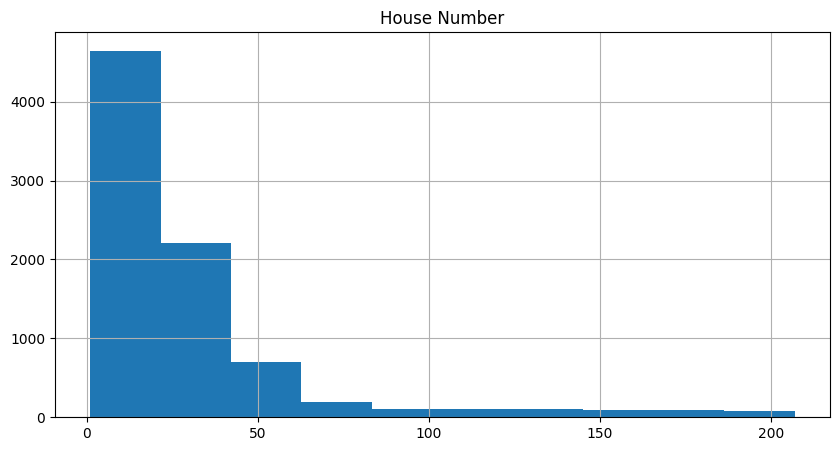

In [28]:
plt.figure(dpi = 10)
census06.hist(figsize = (10, 5))
plt.show()

- The charts of House number is displayed and this shows that Age is not regarded as numeric.

# View categorical columns

In [29]:
#this displays the all data that are object
census06_object = census06.select_dtypes(include = "object")
census06_object

,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...
8324,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,Poole Stronghold,Pamela,Evans,0,Daughter,NaN,Female,Child,None,NaN


# Other categorical checks

In [30]:
census06['Age']

0       50
1       52
2       69
3       72
4       36
        ..
8324    56
8325    43
8326    43
8327     0
8328    24
Name: Age, Length: 8329, dtype: object

In [31]:
# this displays all the unique values in the Age column
census06['Age'].unique()

array(['50', '52', '69', '72', '36', '42', '38', '7', '29', '32', '62',
       '80', '56', '55', '25', '17', '63', '23', '22', '39', '41', '2',
       '1', '67', '65', '28', '27', '5', '4', '3', '20', '19', '49',
       '83.71794888354226', '14.0', '66', '82', '83', '44', '15', '21',
       '46', '45', '43', '64', '59', '34', '10', '9', '35', '0', '68',
       '48', '16', '81', '53', '8', '40', '51', '54', '58', '13', '61',
       '26', '47', '74', '79', '75', '70', '71', '102', '73', '24', '60',
       '30', '33', '11', '31', '61.61015620160364', '62.61015620160364',
       '15.0', '10.0', '18', '37', '12', '14', '6', '57', '89', '85',
       '78', '88', '91', '93', '97', '86', '77', '50.03241969022402',
       '51.03241969022402', '1.0', '90', '76', '104', '84', ' ', '92',
       '87', '95', '98', '105', '48.65904417229777', '50.65904417229777',
       '12.0', '54.55812337483672', '57.55812337483672', '3.0', '0.0',
       '106', '65.90982310589523', '68.90982310589523', '16.0', '94',

- this age column has a variety of items - float, strings, blank cell ' ' which needs to be replaced, additionally, there are strings in it

In [32]:
#this counta the number of unique values
census06['Age'].value_counts()

40                   168
19                   162
43                   152
37                   146
44                   145
                    ... 
83.71794888354226      1
61.61015620160364      1
62.61015620160364      1
15.0                   1
5.0                    1
Name: Age, Length: 127, dtype: int64

In [33]:
pd.DataFrame(census06['Age'].value_counts())

,Age
40,168
19,162
43,152
37,146
44,145
...,...
83.71794888354226,1
61.61015620160364,1
62.61015620160364,1
15.0,1


In [34]:
# checks unique values in Religion
census06['Religion'].unique()

array(['Catholic', 'Methodist', 'None', nan, 'Christian', 'Sikh',
       'Muslim', 'Jewish', 'Buddist', ' ', 'Quaker'], dtype=object)

- the Religion column has blank cell, nan values...

In [35]:
census06['Religion'].value_counts()

None         2800
Christian    1781
Catholic      881
Methodist     547
Muslim        115
Sikh           55
Jewish         38
                4
Quaker          2
Buddist         1
Name: Religion, dtype: int64

In [36]:
pd.DataFrame(census06['Religion'].value_counts())

,Religion
None,2800
Christian,1781
Catholic,881
Methodist,547
Muslim,115
Sikh,55
Jewish,38
,4
Quaker,2
Buddist,1


In [37]:
#checks the most occuring vlaue
census06['Religion'].mode()

0    None
Name: Religion, dtype: object

In [38]:
#checks unique values in Marital Status
census06['Marital Status'].unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed', ' '], dtype=object)

- Marital Status column has blank cell '' and nan values

In [39]:
census06['Marital Status'].value_counts()

Single      2941
Married     2225
Divorced     744
Widowed      360
               3
Name: Marital Status, dtype: int64

In [40]:
pd.DataFrame(census06['Marital Status'].value_counts())

,Marital Status
Single,2941
Married,2225
Divorced,744
Widowed,360
,3


In [41]:
#check the most occuring value
census06['Marital Status'].mode()

0    Single
Name: Marital Status, dtype: object

In [42]:
#checks unique values in Gender
census06['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [43]:
census06['Gender'].value_counts()

Female    4302
Male      4027
Name: Gender, dtype: int64

- there are 4302 females and 4027 males in the census dataset

In [44]:
 pd.DataFrame(census06['Gender'].value_counts())

,Gender
Female,4302
Male,4027


In [45]:
#checks unique values in Occupation
census06['Occupation'].unique()

array(['Engineer, building services', 'Engineer, mining', 'Unemployed',
       ..., 'Retired Multimedia programmer',
       'Retired Commercial/residential surveyor',
       'Retired Control and instrumentation engineer'], dtype=object)

In [46]:
census06['Occupation'].value_counts()

Student                                         1669
University Student                               559
Unemployed                                       513
Child                                            500
Secretary, company                                16
                                                ... 
Retired Immunologist                               1
Retired Furniture designer                         1
Hydrogeologist                                     1
Retired Engineering geologist                      1
Retired Control and instrumentation engineer       1
Name: Occupation, Length: 1058, dtype: int64

In [47]:
pd.DataFrame(census06['Occupation'].value_counts())

,Occupation
Student,1669
University Student,559
Unemployed,513
Child,500
"Secretary, company",16
...,...
Retired Immunologist,1
Retired Furniture designer,1
Hydrogeologist,1
Retired Engineering geologist,1


In [48]:
#checks unique values in Infirmity
census06['Infirmity'].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', ' ', 'Disabled', 'Blind', 'Deaf'],
      dtype=object)

- Infirmity column has blank cells

In [49]:
census06['Infirmity'].value_counts()

None                   8261
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
                          8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

In [50]:
 pd.DataFrame(census06['Infirmity'].value_counts())

,Infirmity
None,8261
Physical Disability,17
Mental Disability,13
Blind,10
Unknown Infection,8
,8
Deaf,8
Disabled,4


In [51]:
#checks unique values in Relationship to Head of House
census06['Relationship to Head of House'].unique()

array(['Head', 'Partner', 'Husband', 'Son', 'None', 'Daughter', 'Wife',
       'Grandson', 'Lodger', 'Visitor', 'Cousin', 'Step-Son', 'Sibling',
       'Granddaughter', 'Step-Daughter', 'Adopted Son', 'Nephew',
       'Adopted Daughter', 'Son-in-law', 'Neice', 'Daughter-in-law',
       'Adopted Grandson', 'Adopted Granddaughter'], dtype=object)

In [52]:
census06['Relationship to Head of House'].value_counts()

Head                     2824
Son                      1429
Daughter                 1371
Husband                   799
None                      549
Lodger                    404
Wife                      308
Partner                   247
Cousin                     73
Grandson                   70
Granddaughter              68
Sibling                    56
Visitor                    29
Step-Son                   25
Step-Daughter              22
Adopted Son                21
Adopted Daughter           14
Nephew                      9
Neice                       7
Son-in-law                  1
Daughter-in-law             1
Adopted Grandson            1
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [53]:
pd.DataFrame(census06['Relationship to Head of House'].value_counts())

,Relationship to Head of House
Head,2824
Son,1429
Daughter,1371
Husband,799
None,549
Lodger,404
Wife,308
Partner,247
Cousin,73
Grandson,70


# (iii) Finding unwanted outliers

- May include persons over 122 years
-Persons below 18 and married
-Persons below 18 and Head 
-Person below 18 and retired
-These will be treated under age

array([[<Axes: title={'center': 'House Number'}>]], dtype=object)

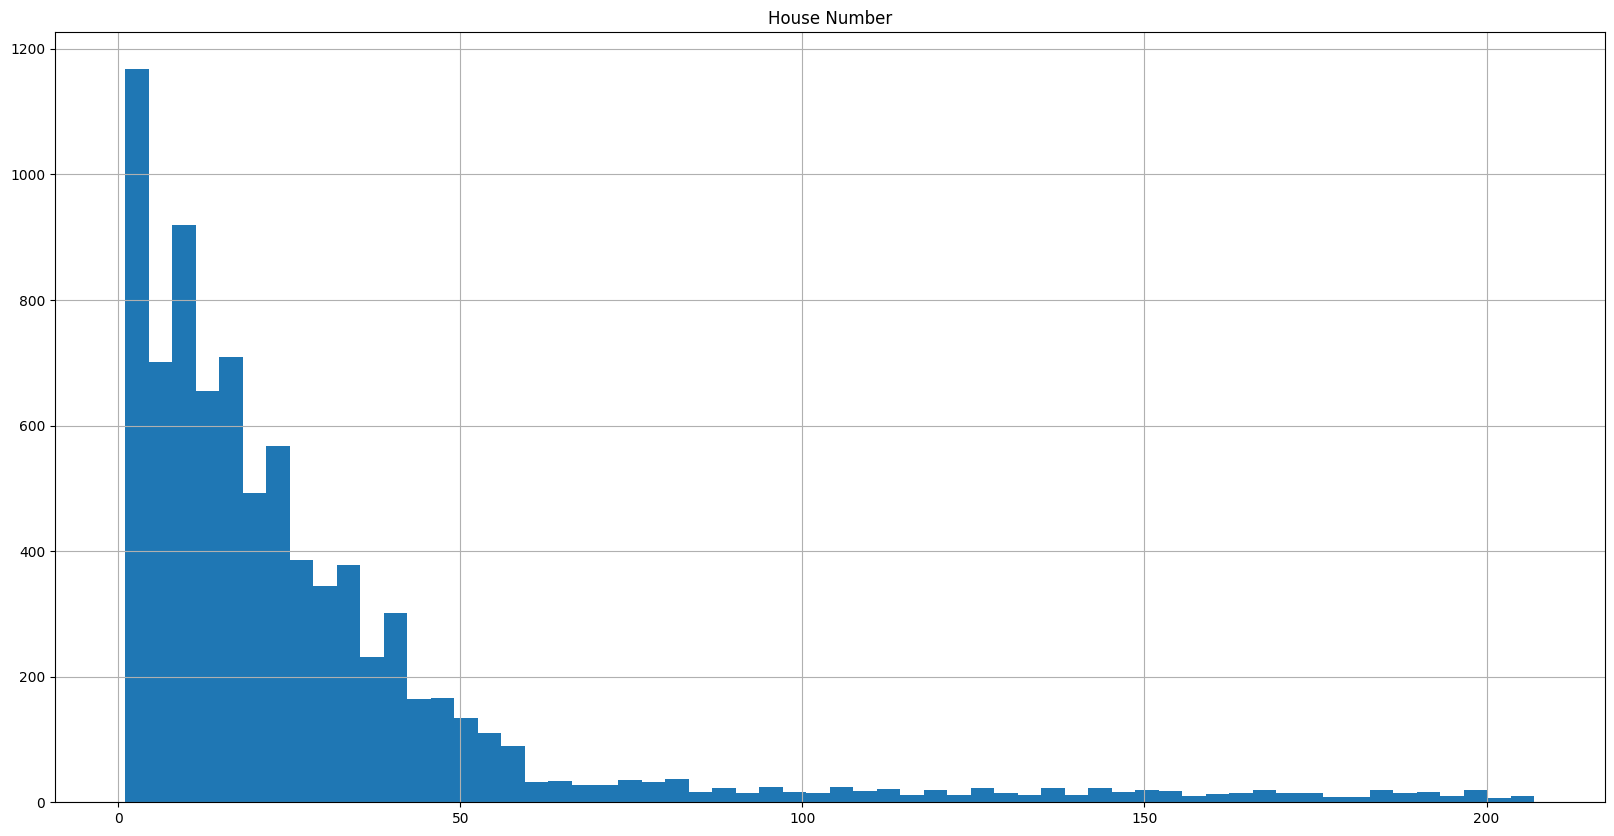

In [54]:
census06.hist(bins=60, figsize=(20,10))

# Step 4: Data Cleaning
# i) Cleaning Age column

- This involves changing all 127 inconsistent data and blank cells into to integers, and replacing the blank cell with relevant data

In [55]:
# use try and exception to get errors
for num in census06["Age"]:
    try: 
        age = float(num)
    except Exception as Valuerror:
        print(Valuerror)

could not convert string to float: ' '
could not convert string to float: ' '


- This confirms that there are 2 problematic/blank cells in the Age column which has made it difficult to explore the column easily

In [56]:
for row_no, num in enumerate (census06["Age"]):
    try: 
        age = float(num)
    except Exception as Valuerror:
        print(f"{Valuerror} in {row_no}")

could not convert string to float: ' ' in 2206
could not convert string to float: ' ' in 4317


In [57]:
#checking for blank cells in age column
census06[census06["Age"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,,Son,Single,Male,University Student,None,Christian


In [58]:
#checks the persons with similar surname and street
census06.loc[(census06["Surname"] == "Richards") & (census06["Street"] == "Smith Plains"), ['Surname', 'Street']]

,Surname,Street
4315,Richards,Smith Plains
4316,Richards,Smith Plains
4317,Richards,Smith Plains


In [59]:
#displays data in all rows listed
census06.loc[[4315, 4316, 4317]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4315,47,Smith Plains,Ellie,Richards,52,Head,Married,Female,Financial adviser,None,Christian
4316,47,Smith Plains,Guy,Richards,48,Husband,Married,Male,Insurance claims handler,None,None
4317,47,Smith Plains,Hugh,Richards,,Son,Single,Male,University Student,None,Christian


- Hugh Richards is a son as well as University student.  The minimum age to study a degree programme at the university is 
normally at least 17 years old on the date of registration, hence his age can be deduced as 18years.

In [60]:
#checks the persons with similar surname and street
census06.loc[(census06["Surname"] == "Johnson") & (census06["Street"] == "Andrews Mill"), ['Surname', 'Street']]

,Surname,Street
2205,Johnson,Andrews Mill
2206,Johnson,Andrews Mill
2207,Johnson,Andrews Mill


In [61]:
# dispalys all data in the liste drows
census06.loc[[2205, 2206, 2207]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2205,17,Andrews Mill,Sophie,Johnson,32,Head,Married,Female,Accounting technician,None,None
2206,17,Andrews Mill,Christopher,Johnson,,Husband,Married,Male,Wellsite geologist,None,None
2207,17,Andrews Mill,Ronald,Johnson,3,Son,NaN,Male,Child,None,NaN


- Christopher Johnson is a husband as well as having a job. It is common in demography to split the population into three broad age groups: children and young adolescents (under 15 years old) the working-age population (16-64 years) and the elderly population (65 years and older).
Christopher age may be deduced as 35 years, which happens to also be the mean/median

In [62]:
#replace with median age
census06.loc[2206, 'Age'] = 35

In [63]:
census06.loc[4317, 'Age'] = 18

In [64]:
census06.loc[[2206, 4317]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,35,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,18,Son,Single,Male,University Student,None,Christian


In [65]:
# check if error still exist
for num in census06["Age"]:
    try: 
        age = float(num)
    except Exception as error:
        print(error)

In [66]:
# check if error still exist
for row_no, num in enumerate (census06["Age"]):
    try:
        age = float(num)
    except Exception as Valuerror:
        print(f"{Valuerror} in {row_no}")

In [67]:
#change all age data to float
census06['Age'] = census06['Age'].astype(float)

In [68]:
#change all age data to integer
census06['Age'] = census06['Age'].astype(int)

In [69]:
#displays the statistical summary of age
census06["Age"].describe()

count    8329.000000
mean       35.290431
std        21.374773
min         0.000000
25%        18.000000
50%        35.000000
75%        50.000000
max       106.000000
Name: Age, dtype: float64

- The statistical summary of Age column is now displayed after the cleaning the column. 
- The average age is 35 years with the minimum amd maximum ages being 0 and 106 years respectively.
- 25% of the population have ages 0-18 while 75% of the population are 50 years and above

In [70]:
#gives the median of persons with greater than 18 and are married
census06[(census06['Age'] > 18) & (census06['Marital Status'] == 'Married')].median()

House Number    18.0
Age             49.0
dtype: float64

In [71]:
#Check the features of the person aged 106 to see any outlier
census06.loc[(census06["Age"] == 106)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6599,5,Coin Skyway,Darren,Hayward,106,Husband,Married,Male,Retired Fitness centre manager,None,Catholic


# any outlier?

In [72]:
for i in census06["Age"]:
    if i > 122:
        print(i)

In [73]:
(census06["Age"]>122).any().any()

False

- there is nobody above 122 years old

In [74]:
#checks if there is an age less than 0
(census06["Age"] < 0).any().any()

False

- there is no negative age in the dataset

In [75]:
#checks all the ages that 0 year old
(census06["Age"] == 0).sum()

88

- there are 88 persons who are 0 year old (under the age of 1) and are born in the last 1 year

In [76]:
(census06["Age"] == 1).sum()

87

- there are 87 persons who are 1 year old and are born within the last 2 year

In [77]:
(census06["Age"] == 2).sum()

113

- there are 113 persons who are 2 yeasr old and are born within the last 3 year

In [78]:
(census06["Age"] == 3).sum()

112

- there are 112 persons who are 3 year old and are born within the last 4 year

In [79]:
(census06["Age"] == 4).sum()

100

- there are 100 persons who are 4 years old and are born within the last 5 year

In [80]:
(census06["Age"] >66).sum()

737

- there are 787 persons who are above 65 years old, the retirement age by law

In [81]:
census06[(census06['Age'] < 18) & (census06['Marital Status'] == 'Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2432,7,Edwards Drive,Jenna,Browne,17,Head,Married,Female,Student,None,NaN
2665,17,Solstice Lane,Gail,Doyle,16,Head,Married,Female,Student,None,NaN


In [82]:
census06[(census06['Age'] < 18) & (census06['Relationship to Head of House'] == 'Head')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2432,7,Edwards Drive,Jenna,Browne,17,Head,Married,Female,Student,None,NaN
2665,17,Solstice Lane,Gail,Doyle,16,Head,Married,Female,Student,None,NaN


In [83]:
census06[(census06['Age'] < 18) & (census06['Occupation'] == 'Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- No person under 18 is retired

- each will be treated below

# ii) Cleaning Marital Status column

In [84]:
census06["Marital Status"].unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed', ' '], dtype=object)

- The entries for this column are 'Single', 'Married', 'Divorced', nan, 'Widowed', ' ' but ' ' need to be replaced

In [85]:
census06["Marital Status"].value_counts() 

Single      2941
Married     2225
Divorced     744
Widowed      360
               3
Name: Marital Status, dtype: int64

- There are 3 cells with ' ' that need to be replaced 

In [86]:
census06["Marital Status"].describe()

count       6273
unique         5
top       Single
freq        2941
Name: Marital Status, dtype: object

In [87]:
census06[census06["Marital Status"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,,Male,University Student,None,Christian


- The 3 cell row are 4328, 7103 and 7460

In [88]:
#displays persons with similar surname and same street
census06.loc[(census06["Surname"] == "Hilton") & (census06["Street"] == "Smith Plains"), ['Surname', 'Street']]

,Surname,Street
4328,Hilton,Smith Plains
4329,Hilton,Smith Plains
4330,Hilton,Smith Plains
4331,Hilton,Smith Plains
4332,Hilton,Smith Plains


In [89]:
#displays all the rows listed
census06.loc[[4328, 4329, 4330, 4331, 4332]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,,Female,Hospital doctor,None,Christian
4329,53,Smith Plains,Adrian,Hilton,53,Husband,Married,Male,"Accountant, chartered management",None,None
4330,53,Smith Plains,Laura,Hilton,27,Daughter,Single,Female,Facilities manager,None,Christian
4331,53,Smith Plains,Richard,Hilton,27,Son,Single,Male,Barrister's clerk,None,Christian
4332,53,Smith Plains,Jean,Hilton,16,Daughter,NaN,Female,Student,None,NaN


- Lynn Hilton is married from the survey of people with similar surname living in the same house

In [90]:
#displays persons with similar surname and same street
census06.loc[(census06["Surname"] == "Taylor") & (census06["Street"] == "Ellis Mountain"), ['Surname', 'Street']]

,Surname,Street
7093,Taylor,Ellis Mountain
7094,Taylor,Ellis Mountain
7103,Taylor,Ellis Mountain


In [91]:
#displays all data in the rows listed
census06.loc[[7093, 7094, 7103]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7093,18,Ellis Mountain,Glen,Taylor,43,Head,Married,Male,Tourism officer,None,Christian
7094,18,Ellis Mountain,Georgia,Taylor,42,Wife,Married,Female,Barrister's clerk,None,None
7103,24,Ellis Mountain,Susan,Taylor,19,None,,Female,University Student,None,Christian


- Susan Taylor is less likely the daughter in this household as she lives in different house, however she seems Single

In [92]:
#displays persons with similar surname and same street
census06.loc[(census06["Surname"] == "King") & (census06["Street"] == "Freeman Trail"), ['Surname', 'Street']]

,Surname,Street
7391,King,Freeman Trail
7460,King,Freeman Trail


In [93]:
#displays all rows
census06.loc[[7391, 7460]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7391,10,Freeman Trail,Lydia,King,49,None,Single,Female,Games developer,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,,Male,University Student,None,Christian


- Adrian may be single 


In [94]:
#replace each row 
census06.loc[[4328, 7103, 7460], 'Marital Status'] = [ 'Married', 'Single', 'Single']

In [95]:
#check if replaced
census06.loc[[4328, 7103, 7460], 'Marital Status']

4328    Married
7103     Single
7460     Single
Name: Marital Status, dtype: object

In [96]:
#check if blank is still present
census06[census06["Marital Status"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [97]:
# displays all rows in Marital status with null
census06[census06["Marital Status"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,NaN,Male,Student,None,NaN
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,NaN,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,NaN,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,NaN,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,NaN,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,NaN,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,NaN,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,NaN,Male,Child,None,NaN


- From the result above, there is a likelihood that persons below 18 have NaN as Marital Status.
- The above may apply to Religion too.
- Hence the need to consider further

In [98]:
#displays persons with age greater than 18 with null marital status
census06[(census06['Age'] > 18) & (census06['Marital Status'].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- there is no person age above 18 with NaN values

In [99]:
#displays persons with age less than 18 with null marital status
census06[(census06['Age'] < 18) & (census06['Marital Status'].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,NaN,Male,Student,None,NaN
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,NaN,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,NaN,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,NaN,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,NaN,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,NaN,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,NaN,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,NaN,Male,Child,None,NaN


- the shows that the number of columns and rows in the null values of the Marital Status column is the same with 
persons aged under 18 and have null values.
- this confirms that until 18yrs when children come of understanding and have the right to choose, they do not belong to any
marital category

In [100]:
#displays persons aged below 18 and single
census06.loc[(census06["Age"] < 18) & (census06["Marital Status"] == 'Single'), ['Age', 'Marital Status']]

,Age,Marital Status


- theres no one below 18 that is regarded as single

In [101]:
#displays persons aged below 18 and married
census06.loc[(census06["Age"] ==18) & (census06["Marital Status"] == 'Widowed'), ['Age', 'Marital Status']]

,Age,Marital Status
526,18,Widowed
1356,18,Widowed
3710,18,Widowed
6264,18,Widowed


In [102]:
census06.loc[[526, 1356, 3710,6264]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
526,35,Peninsula Drive,Jacob,Thorpe,18,Son,Widowed,Male,Student,None,None
1356,198,Wessex Drive,Vincent,Evans,18,Son,Widowed,Male,Student,None,None
3710,2,Portsmouth Street,Leslie,Walton,18,Son,Widowed,Male,Student,None,Christian
6264,15,Elliott Crescent,Mary,Lloyd,18,Daughter,Widowed,Female,Student,None,None


In [103]:
#displays persons with similar surname and street
census06.loc[(census06["Surname"] == 'Thorpe') & (census06["Street"] == 'Peninsula Drive'), ['Surname', 'Street']]

,Surname,Street
523,Thorpe,Peninsula Drive
524,Thorpe,Peninsula Drive
525,Thorpe,Peninsula Drive
526,Thorpe,Peninsula Drive
527,Thorpe,Peninsula Drive


In [104]:
census06.loc[[523,524,525,526,527]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
523,35,Peninsula Drive,Beverley,Thorpe,50,Head,Married,Female,Toxicologist,None,Christian
524,35,Peninsula Drive,Henry,Thorpe,57,Husband,Married,Male,Acupuncturist,None,Christian
525,35,Peninsula Drive,Anna,Thorpe,18,Daughter,Single,Female,Student,None,None
526,35,Peninsula Drive,Jacob,Thorpe,18,Son,Widowed,Male,Student,None,None
527,35,Peninsula Drive,Stephanie,Thorpe,16,Daughter,NaN,Female,Student,None,NaN


- it is obvious 526 is not widowed and this must have been an error which will be replaced with single as he lives with family

In [105]:
#replace
census06.loc[[526], 'Marital Status'] = ['Single']

In [106]:
census06.loc[(census06["Surname"] == 'Evans') & (census06["Street"] == 'Wessex Drive') & (census06['House Number'] ==198), ['Surname', 'Street']]

,Surname,Street
1354,Evans,Wessex Drive
1355,Evans,Wessex Drive
1356,Evans,Wessex Drive
1357,Evans,Wessex Drive


In [107]:
census06.loc[[1354,1355,1356,1357]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1354,198,Wessex Drive,Chelsea,Evans,58,Head,Married,Female,Tree surgeon,None,Christian
1355,198,Wessex Drive,Adrian,Evans,62,Husband,Married,Male,Unemployed,None,Christian
1356,198,Wessex Drive,Vincent,Evans,18,Son,Widowed,Male,Student,None,None
1357,198,Wessex Drive,Julian,Evans,16,Adopted Son,NaN,Male,Student,None,NaN


- it is obvious this is also an error 1356 cannot be widowed

In [108]:
census06.loc[[1356], 'Marital Status'] = ['Single']

In [109]:
census06.loc[(census06["Surname"] == 'Walton') & (census06["Street"] == 'Portsmouth Street') & (census06['House Number'] ==2), ['Surname', 'Street']]

,Surname,Street
3708,Walton,Portsmouth Street
3709,Walton,Portsmouth Street
3710,Walton,Portsmouth Street
3711,Walton,Portsmouth Street
3712,Walton,Portsmouth Street
3713,Walton,Portsmouth Street
3714,Walton,Portsmouth Street
3715,Walton,Portsmouth Street


In [110]:
census06.loc[[3708,3709,3710,3711,3712,3713,3714,3715]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3708,2,Portsmouth Street,Susan,Walton,49,Head,Single,Female,Broadcast presenter,None,Christian
3709,2,Portsmouth Street,Teresa,Walton,18,Daughter,Single,Female,Student,None,Christian
3710,2,Portsmouth Street,Leslie,Walton,18,Son,Widowed,Male,Student,None,Christian
3711,2,Portsmouth Street,Kieran,Walton,17,Son,NaN,Male,Student,None,NaN
3712,2,Portsmouth Street,Joseph,Walton,15,Son,NaN,Male,Student,None,NaN
3713,2,Portsmouth Street,Tina,Walton,12,Daughter,NaN,Female,Student,None,NaN
3714,2,Portsmouth Street,Brenda,Walton,11,Daughter,NaN,Female,Student,None,NaN
3715,2,Portsmouth Street,Brett,Walton,8,Son,NaN,Male,Student,None,NaN


-- this seems like a single mother , 3708 who has got kids including a twin. But 3710 isnt likely widowed

In [111]:
census06.loc[[3710], 'Marital Status'] = ['Single']

In [112]:
census06.loc[(census06["Surname"] == 'Lloyd') & (census06["Street"] == 'Elliott Crescent') & (census06['House Number'] ==15), ['Surname', 'Street']]

,Surname,Street
6261,Lloyd,Elliott Crescent
6262,Lloyd,Elliott Crescent
6263,Lloyd,Elliott Crescent
6264,Lloyd,Elliott Crescent
6265,Lloyd,Elliott Crescent
6266,Lloyd,Elliott Crescent
6267,Lloyd,Elliott Crescent
6268,Lloyd,Elliott Crescent
6269,Lloyd,Elliott Crescent


In [113]:
census06.loc[[6261,6262,6263,6264,6265,6266,6267,6268,6269]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6261,15,Elliott Crescent,Hollie,Lloyd,28,Daughter,Single,Female,Games developer,None,Christian
6262,15,Elliott Crescent,Lucy,Lloyd,25,Daughter,Single,Female,"Production assistant, radio",None,Christian
6263,15,Elliott Crescent,Diana,Lloyd,19,Daughter,Single,Female,University Student,None,Christian
6264,15,Elliott Crescent,Mary,Lloyd,18,Daughter,Widowed,Female,Student,None,None
6265,15,Elliott Crescent,Nicola,Lloyd,14,Daughter,NaN,Female,Student,None,NaN
6266,15,Elliott Crescent,Neil,Lloyd,14,Son,NaN,Male,Student,None,NaN
6267,15,Elliott Crescent,Katie,Lloyd,11,Daughter,NaN,Female,Student,None,NaN
6268,15,Elliott Crescent,Allan,Lloyd,10,Son,NaN,Male,Student,None,NaN
6269,15,Elliott Crescent,Lewis,Lloyd,8,Son,NaN,Male,Student,None,NaN


In [114]:
census06.loc[[6264], 'Marital Status'] = ['Single']

In [115]:
#displays persons aged below 18 and married
census06.loc[(census06["Age"] < 18) & (census06["Marital Status"] == 'Married'), ['Age', 'Marital Status']]

,Age,Marital Status
2432,17,Married
2665,16,Married


In [116]:
#shows the rows listed
census06.loc[[2432, 2665]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2432,7,Edwards Drive,Jenna,Browne,17,Head,Married,Female,Student,None,NaN
2665,17,Solstice Lane,Gail,Doyle,16,Head,Married,Female,Student,None,NaN


- there are 2 persons under 18 that are married and also head which will be investigated further 

In [117]:
#displays persons with similar surname and street
census06.loc[(census06["Surname"] == 'Browne') & (census06["Street"] == 'Edwards Drive'), ['Surname', 'Street']]

,Surname,Street
2432,Browne,Edwards Drive
2433,Browne,Edwards Drive
2434,Browne,Edwards Drive


In [118]:
#displays the rows listed
census06.loc[[2432, 2433, 2434]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2432,7,Edwards Drive,Jenna,Browne,17,Head,Married,Female,Student,None,NaN
2433,7,Edwards Drive,Bryan,Browne,19,Husband,Married,Male,University Student,None,NaN
2434,7,Edwards Drive,Charlie,Browne,0,Son,NaN,Male,Child,None,NaN


- it apppears it a young family with a baby and this will be upheld

In [119]:
#checks persons with same surname and street
census06.loc[(census06["Surname"] == 'Doyle') & (census06["Street"] == 'Solstice Lane'), ['Surname', 'Street']]

,Surname,Street
2665,Doyle,Solstice Lane
2666,Doyle,Solstice Lane
2667,Doyle,Solstice Lane


In [120]:
census06.loc[[2665, 2666, 2667]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2665,17,Solstice Lane,Gail,Doyle,16,Head,Married,Female,Student,None,NaN
2666,17,Solstice Lane,Jeremy,Doyle,19,Husband,Married,Male,Merchant navy officer,None,NaN
2667,17,Solstice Lane,Jill,Doyle,0,Daughter,NaN,Female,Child,None,NaN


- this is also a young family with a baby

- As this census precedes 2022, the age limit for marriage is 16/17. Therefore, for NAN VALUES under marital Status, it will be regarded that all persons under 18 have NAN and will be regarded as Single except 2432(MRS BROWNE) and 2667(MRS DOYLE) who had early marriage.  -

In [121]:
#get the mode of religion
census06["Marital Status"].mode()

0    Single
Name: Marital Status, dtype: object

In [122]:
#for all NaN value 
census06["Marital Status"].replace(np.nan, 'Single2', inplace=True)

- All those aged under 16 years are considered to be Single in line with the legal age of marriage in England and Wales. In England & Wales, you can get married from the age of 16 if you have parental consent. Without parental consent, 
 you can get married at 18. A law has been passed to remove the 'aged 16' option, but is not yet in force.

In [123]:
census06['Marital Status'].isnull().sum()

0

In [124]:
census06['Marital Status'].value_counts()/census06.shape[0]

Single      0.353824
Married     0.267259
Single2     0.246848
Divorced    0.089326
Widowed     0.042742
Name: Marital Status, dtype: float64

# iii) Cleaning Surname column

In [125]:
census06[census06["Surname"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,,8,Son,Single2,Male,Student,None,NaN


In [126]:
census06.loc[(census06["Street"] == 'Gills Mews')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- with reference to Street and House Number, 5553 has no relationship in the dataset and his details will be upheld same

# iv) Cleaning Infirmity column

- There are missing cells in the Infirmity column

In [127]:
census06[census06['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
344,29,Gold Road,Joanna,Francis,65,Head,Single,Female,Clothing/textile technologist,,Christian
462,13,Peninsula Drive,Lucy,Graham-Rogers,0,Daughter,Single2,Female,Child,,NaN
1284,182,Wessex Drive,Susan,Mills,50,Head,Single,Female,International aid/development worker,,Christian
1587,9,Charity Road,Stewart,Brown,3,Son,Single2,Male,Child,,NaN
1630,18,Charity Road,Jade,Holmes,50,Head,Married,Female,Amenity horticulturist,,None
1665,22,Charity Road,Adrian,Turner,6,Son,Single2,Male,Student,,NaN
7030,8,Naylor Crescent,Olivia,Porter,22,Head,Single,Female,University Student,,None
8101,54,Kestrel Flat,Elizabeth,Singh,43,Head,Married,Female,Trading standards officer,,Christian


- Eight cells under Infirmity are blank and since the proportion is not significant, the blank cells will be replaced by None

In [128]:
# replace all blank cells in infirmity
census06["Infirmity"].replace(" ", 'Undeclared', inplace=True)

In [129]:
census06["Infirmity"].value_counts()

None                   8261
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
Undeclared                8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

In [130]:
census06.loc[census06["Infirmity"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [131]:
census06['Infirmity'].value_counts()/census06.shape[0]

None                   0.991836
Physical Disability    0.002041
Mental Disability      0.001561
Blind                  0.001201
Unknown Infection      0.000960
Undeclared             0.000960
Deaf                   0.000960
Disabled               0.000480
Name: Infirmity, dtype: float64

# iv) Cleaning Religion column

In [132]:
census06[census06['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,None,
6456,1,Gibbs Lane,Donna,Mitchell,85,Head,Divorced,Female,Retired Fast food restaurant manager,None,
6824,53,July Isle,Leon,Marshall,23,None,Single,Male,"Programmer, multimedia",None,
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",None,


In [133]:
#checks person with similar surname and street
census06.loc[(census06["Surname"] == "Scott") & (census06["Street"] == "Riley Avenue"), ['Surname', 'Street']]

,Surname,Street
3054,Scott,Riley Avenue
3055,Scott,Riley Avenue
3207,Scott,Riley Avenue


In [134]:
#displays the rows listed
census06.loc[[3054, 3055, 3207]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,None,
3055,23,Riley Avenue,Adam,Scott,6,Son,Single2,Male,Student,None,NaN
3207,117,Riley Avenue,Holly,Scott,26,Head,Single,Female,"Therapist, art",None,None


- 3054 is the Head and lives has a son whose religion is unknown too

In [135]:
#checks persons with similar surname and street
census06.loc[(census06["Surname"] == "Mitchell") & (census06["Street"] == "Gibbs Lane"), ['Surname', 'Street']]

,Surname,Street
6456,Mitchell,Gibbs Lane


- 6456 is divorced and has no family relation in the dataset with reference to surname and street

In [136]:
#checks for similar surname and street
census06.loc[(census06["Surname"] == "Marshall") & (census06["Street"] == "July Isle"), ['Surname', 'Street']]

,Surname,Street
6824,Marshall,July Isle


- 6824 has no traceable relation in the dataset

In [137]:
#checks for similar surname and street
census06.loc[(census06["Surname"] == "Stephens") & (census06["Street"] == "Blackhook Lane"), ['Surname', 'Street']]

,Surname,Street
7572,Stephens,Blackhook Lane
7573,Stephens,Blackhook Lane
7574,Stephens,Blackhook Lane


In [138]:
#displays all related rows
census06.loc[[7572, 7573,7574]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7572,12,Blackhook Lane,Alice,Stephens,49,Head,Married,Female,Bookseller,None,Methodist
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",None,
7574,12,Blackhook Lane,James,Stephens,17,Son,Single2,Male,Student,None,NaN


- 7573 is a husband who is married to the Head oof House who happend to be a Methodist. He also has a son named James, he is most likely a Methodist too.

In [139]:
# replace blank with relevant religion
census06.loc[7573, 'Religion'] = 'Methodist'

In [140]:
census06.loc[[7573]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",None,Methodist


In [141]:
#other blank cells are replaced with None
census06["Religion"].replace(" ", None, inplace=True)

In [142]:
census06['Religion'].unique()

array(['Catholic', 'Methodist', 'None', nan, 'Christian', 'Sikh',
       'Muslim', 'Jewish', 'Buddist', None, 'Quaker'], dtype=object)

In [143]:
census06["Religion"].value_counts()

None         2800
Christian    1781
Catholic      881
Methodist     548
Muslim        115
Sikh           55
Jewish         38
Quaker          2
Buddist         1
Name: Religion, dtype: int64

In [144]:
census06["Religion"].isnull().sum()

2108

- there 2108 NaN values in Religion. The stats of this will be checked and also reference to age 18 to see 0-17 who might have religion

In [145]:
census06['Religion'].value_counts()/census06.shape[0]

None         0.336175
Christian    0.213831
Catholic     0.105775
Methodist    0.065794
Muslim       0.013807
Sikh         0.006603
Jewish       0.004562
Quaker       0.000240
Buddist      0.000120
Name: Religion, dtype: float64

In [146]:
census06[census06["Religion"].isnull()].describe()

,House Number,Age
count,2108.000000,2108.000000
mean,28.357211,9.115275
std,35.745581,5.470679
min,1.000000,0.000000
25%,8.000000,5.000000
50%,17.000000,9.000000
75%,33.000000,14.000000
max,207.000000,85.000000


In [147]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Methodist' ), ['Age', 'Religion']]

,Age,Religion


In [148]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Christian' ), ['Age', 'Religion']]

,Age,Religion


In [149]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Muslim' ), ['Age', 'Religion']]

,Age,Religion


In [150]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Catholic' ), ['Age', 'Religion']]

,Age,Religion


In [151]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Buddist' ), ['Age', 'Religion']]

,Age,Religion


In [152]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Jewish' ), ['Age', 'Religion']]

,Age,Religion


In [153]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Sikh' ), ['Age', 'Religion']]

,Age,Religion


In [154]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'Quaker' ), ['Age', 'Religion']]

,Age,Religion


In [155]:
census06.loc[(census06["Age"] < 18) & (census06["Religion"] == 'None' ), ['Age', 'Religion']]

,Age,Religion


In [156]:
census06.loc[(census06["Age"] > 18) & (census06["Religion"] == 'Catholic' ), ['Age', 'Religion']] 
#the religion can be changed to view various results

,Age,Religion
0,50,Catholic
1,52,Catholic
9,32,Catholic
28,29,Catholic
29,27,Catholic
...,...,...
8274,50,Catholic
8275,43,Catholic
8288,50,Catholic
8289,54,Catholic


- It is evident from the above that persons from 0 to 18 have NaN and since religion cannot be imposed on them but they choose
when they come of understanding. So they can be regarded as None too.

In [157]:
census06['Religion'] = census06['Religion'].replace(np.nan, 'None2')

- where None2 represents children 0-18 who have no religion

# vi) Cleaning Occupation column

In [158]:
census06['Occupation'].unique()

array(['Engineer, building services', 'Engineer, mining', 'Unemployed',
       ..., 'Retired Multimedia programmer',
       'Retired Commercial/residential surveyor',
       'Retired Control and instrumentation engineer'], dtype=object)

- There are several occupation that starts with Retired and this will be checked further

In [159]:
#displays all rows with retired starting
census06.loc[census06['Occupation'].str.startswith('Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
11,6,Scott Dale,Debra,Patel,80,Head,Widowed,Female,Retired Chief Executive Officer,None,None
36,15,Scott Dale,Joseph,Moore,83,Head,Widowed,Male,Retired Industrial buyer,None,None
38,16,Scott Dale,Stephanie,Bell,69,Head,Married,Female,Retired Translator,None,Christian
40,17,Scott Dale,Paige,Stevens,82,Head,Married,Female,"Retired Designer, exhibition/display",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8100,53,Kestrel Flat,Mandy,Khan,68,Head,Widowed,Female,Retired Commercial/residential surveyor,None,Jewish
8103,55,Kestrel Flat,Teresa,Smith,70,Head,Widowed,Female,Retired Civil Service administrator,None,Catholic
8127,6,Lloyd Drive,Caroline,Watson,69,Head,Widowed,Female,Retired Textile designer,None,Christian
8298,1,Jones Barracks,Dorothy,Stevenson,71,Head,Married,Female,Retired Associate Professor,None,None


- There are 656 persons who are retired in their various fields. this will be converted to same name, Retired for better view

In [160]:
#replace them with only retired
census06.loc[census06['Occupation'].str.startswith('Retired'), 'Occupation'] = 'Retired'

In [161]:
#display the new rows with retired
census06.loc[census06['Occupation'].str.startswith('Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired,None,Methodist
11,6,Scott Dale,Debra,Patel,80,Head,Widowed,Female,Retired,None,None
36,15,Scott Dale,Joseph,Moore,83,Head,Widowed,Male,Retired,None,None
38,16,Scott Dale,Stephanie,Bell,69,Head,Married,Female,Retired,None,Christian
40,17,Scott Dale,Paige,Stevens,82,Head,Married,Female,Retired,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8100,53,Kestrel Flat,Mandy,Khan,68,Head,Widowed,Female,Retired,None,Jewish
8103,55,Kestrel Flat,Teresa,Smith,70,Head,Widowed,Female,Retired,None,Catholic
8127,6,Lloyd Drive,Caroline,Watson,69,Head,Widowed,Female,Retired,None,Christian
8298,1,Jones Barracks,Dorothy,Stevenson,71,Head,Married,Female,Retired,None,None


In [162]:
#to check if there is anormaly in the age perhap anyone under 18 that is retired
census06[(census06['Age'] < 18) & (census06['Occupation'] == 'Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- There is no retired person below the age 18 years

In [163]:
#to check if there is anormaly in the age perhap anyone under 65 that is retired
census06[(census06['Age'] < 65) & (census06['Occupation'] == 'Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- There is no person in the working age population (16-64) years that is retired

In [164]:
#to check if any person under 18 is a university student
census06[(census06['Age'] < 18) & (census06['Occupation'] == 'University Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


- There is no person below 18 years that is a university student 

In [165]:
# to check if any under 18 are student
census06[(census06['Age'] < 18) & (census06['Occupation'] == 'Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,Single2,Male,Student,None,None2
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,Single2,Male,Student,None,None2
22,9,Scott Dale,Rhys,Smith,7,Son,Single2,Male,Student,None,None2
30,12,Scott Dale,Joe,Taylor,5,Son,Single2,Male,Student,None,None2
37,15,Scott Dale,Samuel,Moore,14,Grandson,Single2,Male,Student,None,None2
...,...,...,...,...,...,...,...,...,...,...,...
8296,1,Faith Bastion,Terence,Lawson,5,Son,Single2,Male,Student,None,None2
8307,1,Jones Barracks,Michelle,Stevenson,16,Daughter,Single2,Female,Student,None,None2
8308,1,Jones Barracks,Guy,Stevenson,12,Son,Single2,Male,Student,None,None2
8309,1,Jones Barracks,Vanessa,Stevenson,10,Daughter,Single2,Female,Student,None,None2


- This shows that about 1558 person who are students are below 18 years old

In [166]:
# to check if any above 18 are student
census06[(census06['Age'] > 18) & (census06['Occupation'] == 'Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [167]:
census06.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [168]:
census06['Occupation'].value_counts()/census06.shape[0]

Student                                  0.200384
Retired                                  0.078761
University Student                       0.067115
Unemployed                               0.061592
Child                                    0.060031
                                           ...   
Development worker, international aid    0.000120
Camera operator                          0.000120
Hydrogeologist                           0.000120
Textile designer                         0.000120
Occupational psychologist                0.000120
Name: Occupation, Length: 644, dtype: float64

In [169]:
census06

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Single2,Female,Child,None,None2


In [170]:
census06.to_csv('cleaned_census06', index = False)

In [171]:
census06.describe()

,House Number,Age
count,8329.000000,8329.000000
mean,29.340737,35.290431
std,35.744848,21.374773
min,1.000000,0.000000
25%,8.000000,18.000000
50%,19.000000,35.000000
75%,35.000000,50.000000
max,207.000000,106.000000


# Step 5: Data Visualisation

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
cleaned_census06 = pd.read_csv('cleaned_census06')

In [174]:
cleaned_census06.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None


In [175]:
cleaned_census06.describe()

,House Number,Age
count,8329.000000,8329.000000
mean,29.340737,35.290431
std,35.744848,21.374773
min,1.000000,0.000000
25%,8.000000,18.000000
50%,19.000000,35.000000
75%,35.000000,50.000000
max,207.000000,106.000000


In [176]:
cleaned_census06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   int64 
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 8329 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       8329 non-null   object
dtypes: int64(2), object(9)
memory usage: 715.9+ KB


# Data Visualization

<Axes: xlabel='Religion', ylabel='count'>

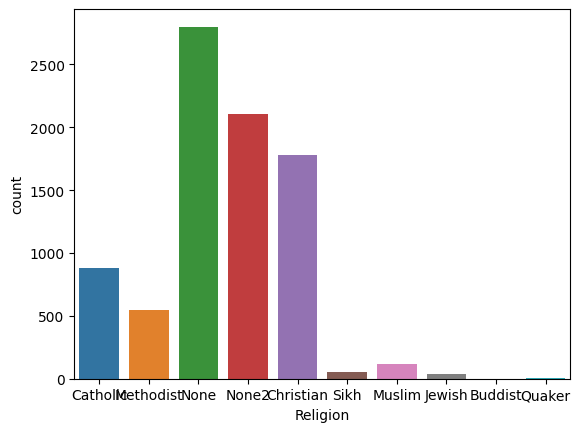

In [177]:
#Visualizing different religions
sns.countplot(x=cleaned_census06['Religion'])

Text(0.5, 1.0, 'Horizontal Barchart of Religion')

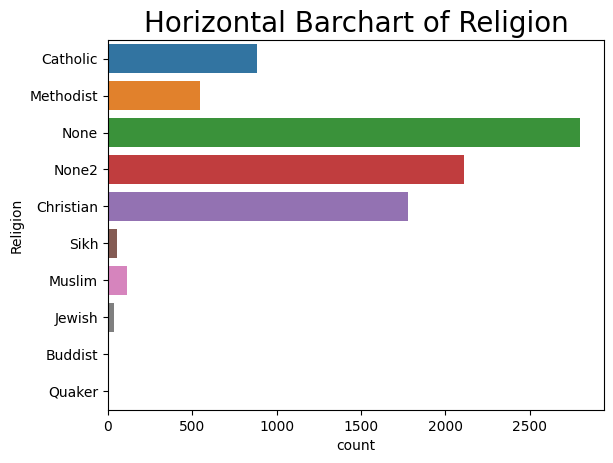

In [178]:
Rc =sns.countplot(y=cleaned_census06['Religion'])
Rc.set_title('Horizontal Barchart of Religion', fontsize=20)

- All the religions stated exist and as there is no way to detect an individual's true religion, the data will be upheld. Moreover, the Sikh, Jewish, Quaker and Buddist represent less than 1% of the total.    

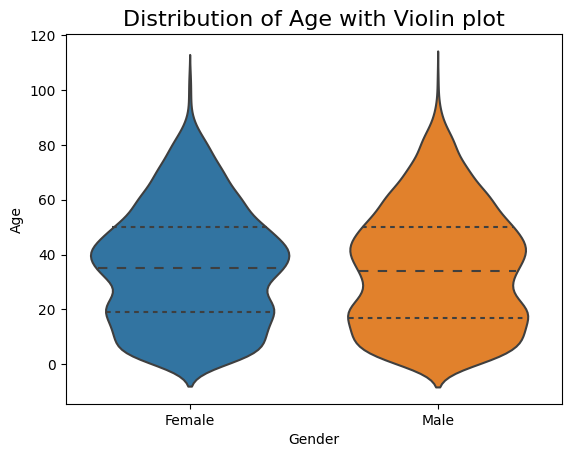

In [179]:
G_Age = sns.violinplot(x="Gender", y="Age", inner='quartile', data=cleaned_census06)
G_Age.set_title('Distribution of Age with Violin plot', fontsize=16);

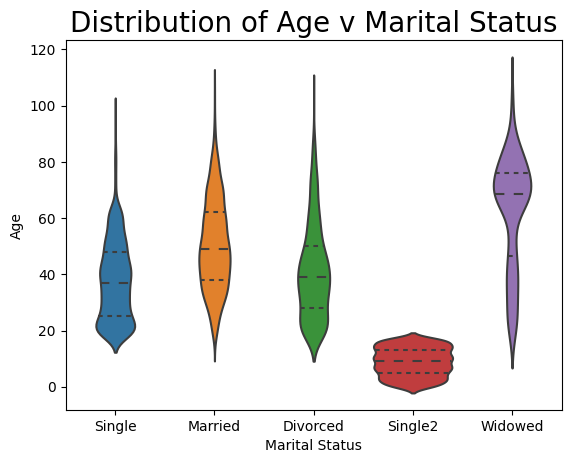

In [180]:
am = sns.violinplot(x="Marital Status", y="Age", inner='quartile', data=cleaned_census06)
am.set_title('Distribution of Age v Marital Status', fontsize=20);

Text(0.5, 1.0, 'Histogram of Age')

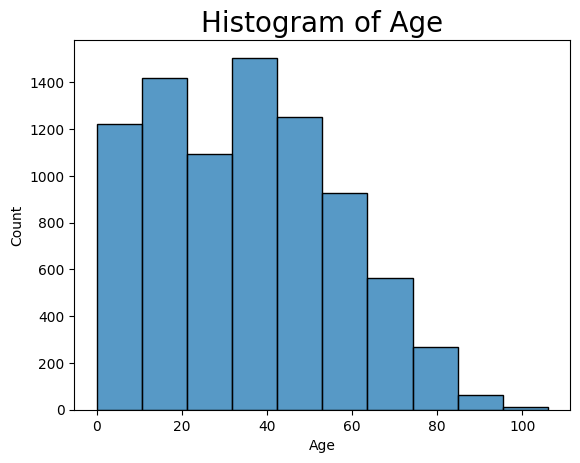

In [181]:
bk= sns.histplot(x=cleaned_census06['Age'], bins=10)
bk.set_title('Histogram of Age', fontsize=20)

In [182]:
cleaned_census06['Age'].mean()

35.29043102413255

In [183]:
cleaned_census06['Age'].median()

35.0

In [184]:
cleaned_census06.groupby("Gender")["Age"].mean()

Gender
Female    35.658298
Male      34.897442
Name: Age, dtype: float64

In [185]:
no_bins = (106-0) // 5
no_bins

21

<Axes: xlabel='Age', ylabel='Count'>

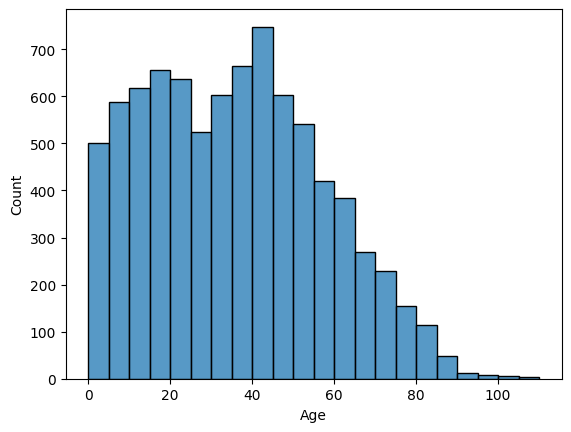

In [186]:
sns.histplot(data=cleaned_census06, x = 'Age', binwidth =5)


Text(0.5, 1.0, 'Distribution of Age with kde')

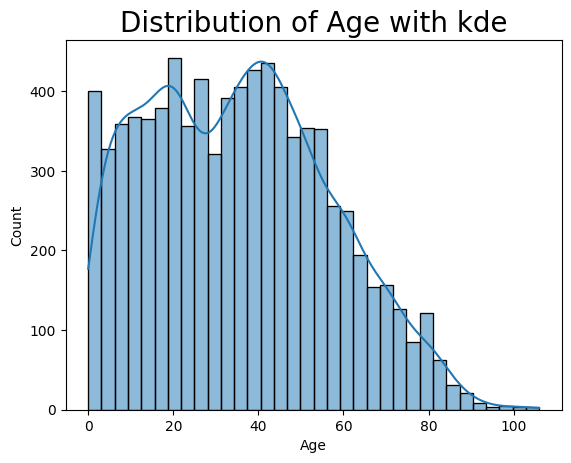

In [187]:
cg = sns.histplot(data= cleaned_census06, x= 'Age', kde= True)
cg.set_title('Distribution of Age with kde', fontsize=20)

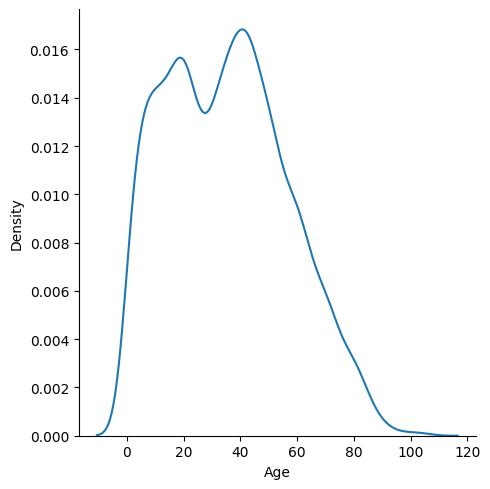

In [188]:
sns.displot(data= cleaned_census06, x='Age', kind = 'kde')

Text(0.5, 1.0, 'Distribution of Age vs Marital Status')

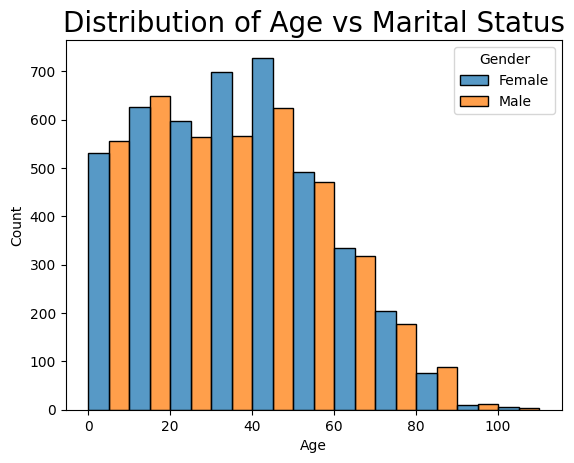

In [189]:
we = sns.histplot(data= cleaned_census06, x= 'Age', hue= 'Gender', multiple = 'dodge', binwidth=10)
we.set_title('Distribution of Age vs Marital Status', fontsize=20)

<Axes: xlabel='Gender', ylabel='Age'>

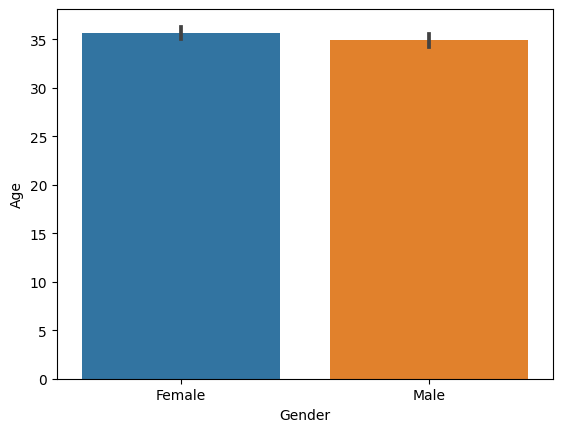

In [190]:
sns.barplot(x= cleaned_census06['Gender'] , y= cleaned_census06['Age'])

<function matplotlib.pyplot.show(close=None, block=None)>

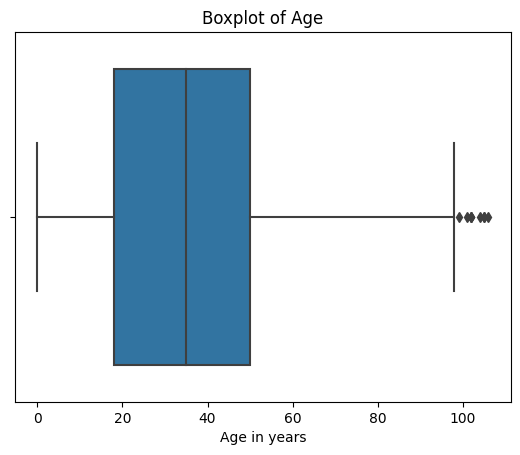

In [191]:
sns.boxplot(x= 'Age' , data= cleaned_census06)
plt.title('Boxplot of Age')
plt.xlabel('Age in years')
plt.show

<Axes: xlabel='Age', ylabel='Marital Status'>

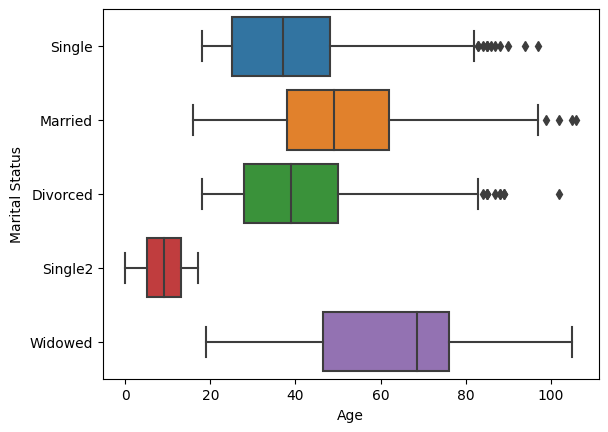

In [192]:
sns.boxplot(data=cleaned_census06, x='Age', y='Marital Status')

<Axes: xlabel='Age', ylabel='Religion'>

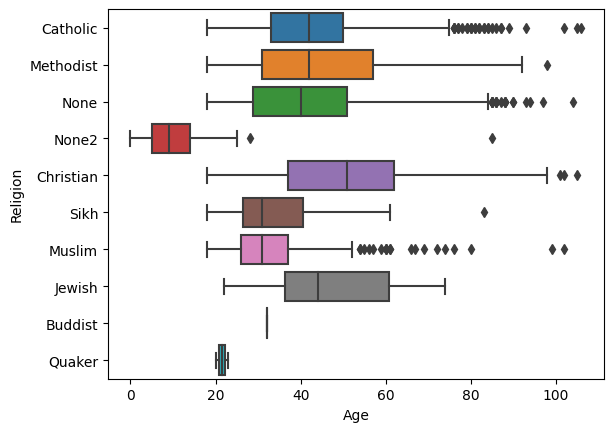

In [193]:
sns.boxplot(data=cleaned_census06, x='Age', y='Religion')

<Axes: xlabel='Age', ylabel='Infirmity'>

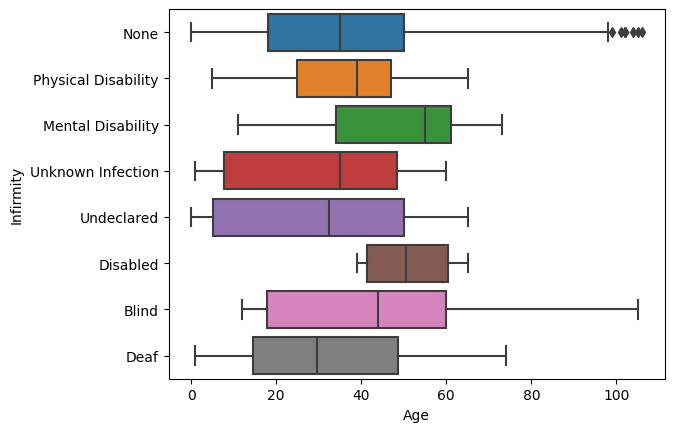

In [194]:
sns.boxplot(data=cleaned_census06, x='Age', y='Infirmity')

<Axes: xlabel='Age', ylabel='Gender'>

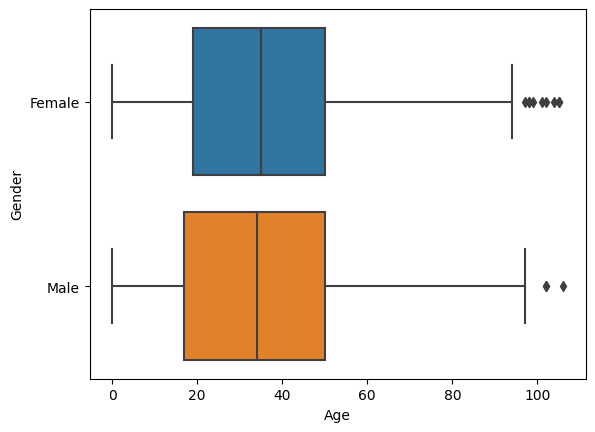

In [195]:
sns.boxplot(data=cleaned_census06, x='Age', y='Gender')

<Axes: ylabel='Age'>

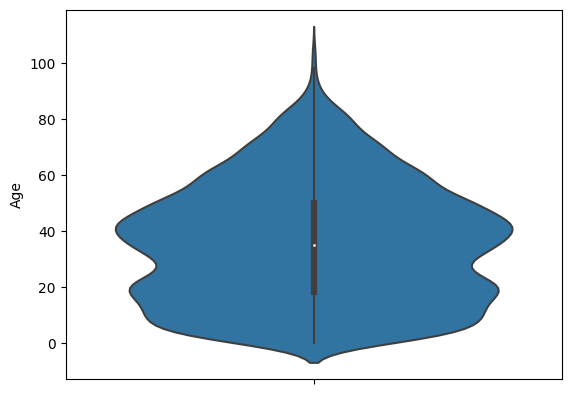

In [196]:
#df = sns.load_dataset("titanic")
sns.violinplot(y=cleaned_census06["Age"])

<Axes: xlabel='Marital Status', ylabel='Age'>

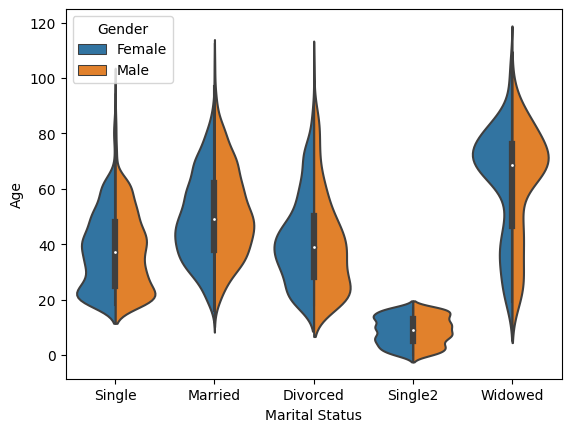

In [197]:
sns.violinplot(data=cleaned_census06, x= 'Marital Status', y= 'Age', hue= 'Gender', split= True)

<Axes: xlabel='Infirmity', ylabel='Age'>

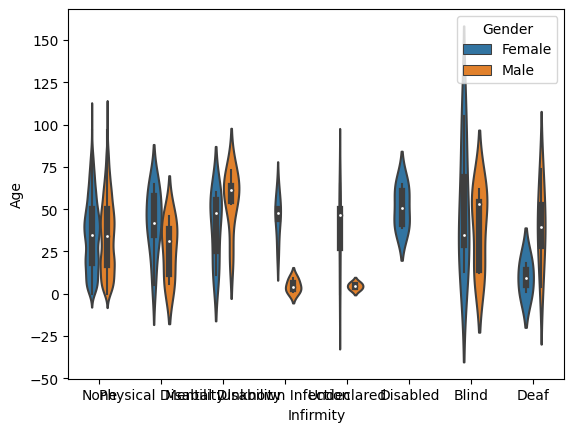

In [198]:
sns.violinplot(data=cleaned_census06, y= 'Age', x= 'Infirmity', hue= 'Gender', width=0.5)
#fig.set_size_inches(8,5)

<Axes: xlabel='Age', ylabel='Count'>

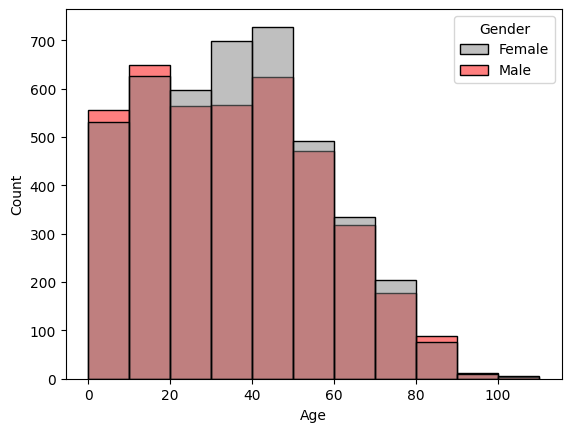

In [199]:
sns.histplot(data=cleaned_census06, x='Age',hue='Gender',palette =['grey', 'red'], binwidth = 10)

In [200]:
cleaned_census06['Infirmity'].value_counts()/cleaned_census06.shape[0]

None                   0.991836
Physical Disability    0.002041
Mental Disability      0.001561
Blind                  0.001201
Unknown Infection      0.000960
Undeclared             0.000960
Deaf                   0.000960
Disabled               0.000480
Name: Infirmity, dtype: float64

<Axes: xlabel='Gender', ylabel='Age'>

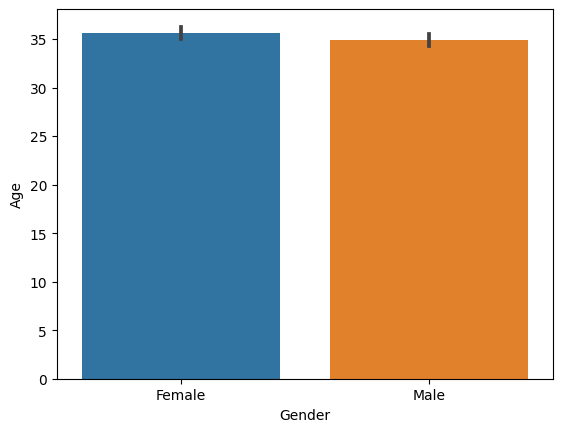

In [201]:
sns.barplot(data=cleaned_census06, x='Gender', y='Age')

<Axes: xlabel='count', ylabel='Infirmity'>

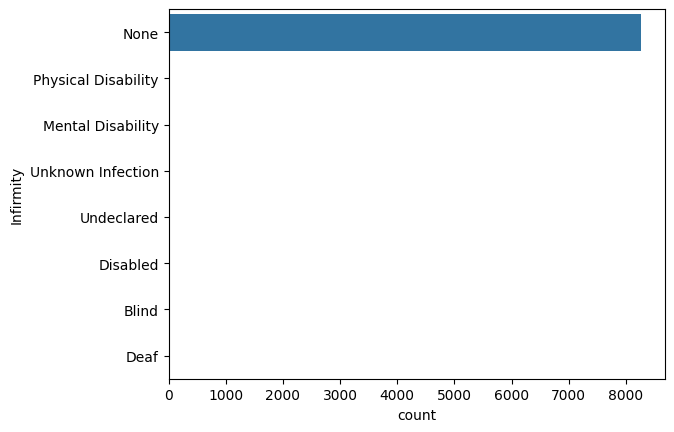

In [202]:
sns.countplot(y=cleaned_census06['Infirmity'])

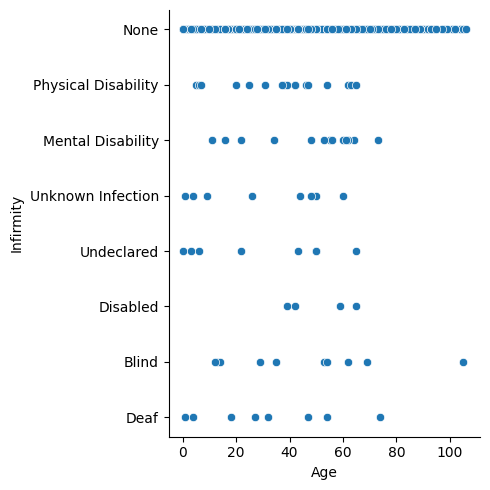

In [203]:
sns.relplot(data=cleaned_census06, x='Age', y='Infirmity')

In [204]:
female_gender= census06['Gender']== 'Female'
females= census06.loc[female_gender, 'Age']
females

0       50
2       69
4       36
6       38
9       32
        ..
8319    27
8320    28
8325    43
8327     0
8328    24
Name: Age, Length: 4302, dtype: int32

In [205]:
male_gender= census06['Gender']== 'Male'
males= census06.loc[male_gender, 'Age']
males

1       52
3       72
5       42
7        7
8       29
        ..
8321    31
8322     3
8323     0
8324    56
8326    43
Name: Age, Length: 4027, dtype: int32

In [206]:
Age_bins = {'0-4':0,'5-9':0,'10-14':0, '15-19':0,'20-24':0,'25-29':0,'30-34':0,'35-39':0,'40-44':0,'45-49':0,'50-54':0,'55-59':0,'60-64':0,'65-69':0,'70-74':0,'75-79':0,'80-84':0,'85-89':0,'90-94':0,'95-99':0,'100-104':0,'105-109':0}
            

In [207]:
def create_cat(age, Age_bins):
    bins = Age_bins.copy()
    age=age.values
    for i in age:
        if 0<i<4:
            bins['0-4']+=1
        if 5<i<9:
            bins['5-9']+=1
        if 10<i<14:
            bins['10-14']+=1
        if 15<i<19:
            bins['15-19']+=1
        if 20<i<24:
            bins['20-24']+=1
        if 25<i<29:
            bins['25-29']+=1
        if 30<i<34:
            bins['30-34']+=1
        if 35<i<39:
            bins['35-39']+=1
        if 40<i<44:
            bins['40-44']+=1
        if 45<i<49:
            bins['45-49']+=1
        if 50<i<54:
            bins['50-54']+=1
        if 55<i<59:
            bins['55-59']+=1
        if 60<i<64:
            bins['60-64']+=1
        if 65<i<69:
            bins['65-69']+=1
        if 70<i<74:
            bins['70-74']+=1
        if 75<i<79:
            bins['75-79']+=1
        if 80<i<84:
            bins['80-84']+=1
        if 85<i<89:
            bins['85-89']+=1
        if 90<i<99:
            bins['90-94']+=1
        if 95<i<99:
            bins['95-99']+=1
        if 100<i<104:
            bins['100-104']+=1
        if 105<i<109:
            bins['105-109']+=1
    return bins

In [208]:
m_age_bins = create_cat(males, Age_bins)
m_age_count= [-1*age for age in m_age_bins.values()]
m_age_count.reverse()
male_age=list(m_age_bins.keys())
male_age.reverse()

In [209]:
f_age_bins = create_cat(females, Age_bins)
f_age_count= [age for age in f_age_bins.values()]
f_age_count.reverse()
female_age=list(f_age_bins.keys())
female_age.reverse()

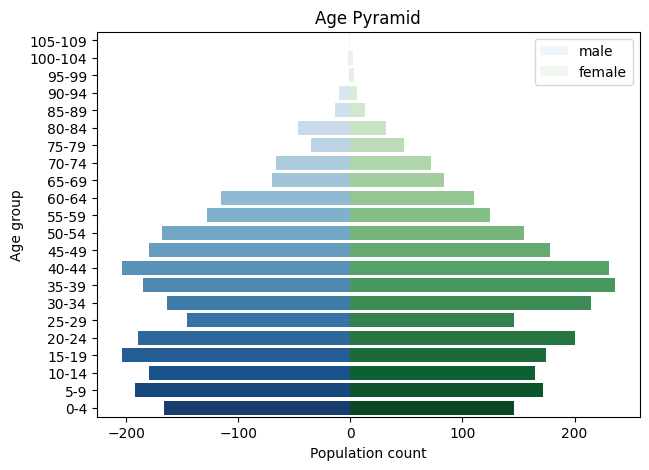

In [210]:
ax1=sns.barplot(x=m_age_count, y=male_age, palette = 'Blues', label= 'male')
ax1=sns.barplot(x=f_age_count, y=female_age, palette = 'Greens', label= 'female')
plt.legend()
plt.title('Age Pyramid')
plt.xlabel('Population count')
plt.ylabel('Age group')
fig=plt.gcf()
fig.set_size_inches(7,5)



In [211]:
(cleaned_census06['Age']==0).sum()

88

In [212]:
cleaned_census06['Marital Status'].value_counts()

Single      2947
Married     2226
Single2     2056
Divorced     744
Widowed      356
Name: Marital Status, dtype: int64

In [213]:
(census06[(census06['Age'] == 29)].count())

House Number                     110
Street                           110
First Name                       110
Surname                          110
Age                              110
Relationship to Head of House    110
Marital Status                   110
Gender                           110
Occupation                       110
Infirmity                        110
Religion                         110
dtype: int64

In [214]:
(census06[(census06['Age'] < 70) & (census06['Marital Status'] == 'Widowed')]).count()

House Number                     194
Street                           194
First Name                       194
Surname                          194
Age                              194
Relationship to Head of House    194
Marital Status                   194
Gender                           194
Occupation                       194
Infirmity                        194
Religion                         194
dtype: int64

# birth rate trend

In [215]:
birth_rate =((cleaned_census06['Age']==5).sum())/len(cleaned_census06)*1000

birth_rate

13.08680513867211

In [216]:
birth_rate =((cleaned_census06['Age']==3).sum())/len(cleaned_census06)*1000
birth_rate

13.446992436066756

In [217]:
birth_rate =((cleaned_census06['Age']==0).sum())/len(cleaned_census06)*1000
birth_rate

10.565494056909593

In [218]:
z= (cleaned_census06['Age']==4).sum()

In [220]:
t=len(census06[(census06['Age'] == 30) & (census06['Gender'] == 'Female')])
u=len(census06[(census06['Age'] == 31) & (census06['Gender'] == 'Female')])
v=len(census06[(census06['Age'] == 32) & (census06['Gender'] == 'Female')])
w=len(census06[(census06['Age'] == 33) & (census06['Gender'] == 'Female')])
x=len(census06[(census06['Age'] == 34) & (census06['Gender'] == 'Female')])
Y=t+u+v+w+x
print(Y)

333


In [221]:
xa=len(census06[(census06['Age'] == 25) & (census06['Gender'] == 'Female')])
xb=len(census06[(census06['Age'] == 26) & (census06['Gender'] == 'Female')])
xd=len(census06[(census06['Age'] == 27) & (census06['Gender'] == 'Female')])
xe=len(census06[(census06['Age'] == 28) & (census06['Gender'] == 'Female')])
xf=len(census06[(census06['Age'] == 29) & (census06['Gender'] == 'Female')])
W=xa+xb+xf+xd+xe
print(W)

266


# Death rate trend

In [222]:
k=len(census06[(census06['Age'] == 56)])
l=len(census06[(census06['Age'] == 57)])
m=len(census06[(census06['Age'] == 58)])
n=len(census06[(census06['Age'] == 59)])
o=len(census06[(census06['Age'] == 60)])
P=k+l+m+n+o
print(P)

429


In [223]:
P/Y

1.2882882882882882

In [224]:
h=len(census06[(census06['Age'] == 61)])
i=len(census06[(census06['Age'] == 62)])
j=len(census06[(census06['Age'] == 63)])
r=len(census06[(census06['Age'] == 64)])
s=len(census06[(census06['Age'] == 65)])
G=h+i+j+r+s    
print(G)

352


In [225]:
(P-G)/Y

0.23123123123123124

In [226]:
aj=len(census06[(census06['Age'] == 66)])
mj=len(census06[(census06['Age'] == 67)])
cj=len(census06[(census06['Age'] == 68)])
dj=len(census06[(census06['Age'] == 69)])
ej=len(census06[(census06['Age'] == 70)])
U=aj+mj+cj+dj+ej
print(U)

263


In [227]:
U/Y

0.7897897897897898

In [228]:
ma=len(census06[(census06['Age'] == 71)])
mb=len(census06[(census06['Age'] == 72)])
mc=len(census06[(census06['Age'] == 73)])
md=len(census06[(census06['Age'] == 74)])
me=len(census06[(census06['Age'] == 75)])
Q=ma+mb+mc+md+me 
print(Q)

209


In [229]:
Q/Y

0.6276276276276276

- the number of people in the 5- year age gap from 56-75 years shows a gradual decline.

In [230]:
cleaned_census06

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Single2,Female,Child,None,None2


In [231]:
Lodger = census06.loc[(census06["Relationship to Head of House"] == "Lodger")]
len(Lodger)

404

In [232]:
grouped_data = cleaned_census06.groupby('Gender')

In [233]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()
# Provide the mean for each numeric column by sex
grouped_data.mean()

,House Number,Age
Gender,,
Female,29.347048,35.658298
Male,29.333996,34.897442


In [240]:
cleaned_census06.groupby("Infirmity")["Age"].median()

Infirmity
Blind                  44.0
Deaf                   29.5
Disabled               50.5
Mental Disability      55.0
None                   35.0
Physical Disability    39.0
Undeclared             32.5
Unknown Infection      35.0
Name: Age, dtype: float64

In [234]:
cleaned_census06.groupby("Marital Status")["Age"].mean()

Marital Status
Divorced    40.983871
Married     50.309075
Single      37.664404
Single2      8.845817
Widowed     62.556180
Name: Age, dtype: float64

In [235]:
cleaned_census06.groupby("Relationship to Head of House")["Age"].mean()

Relationship to Head of House
Adopted Daughter         14.428571
Adopted Granddaughter    22.000000
Adopted Grandson         10.000000
Adopted Son              12.238095
Cousin                   44.369863
Daughter                 15.404085
Daughter-in-law          43.000000
Granddaughter            11.823529
Grandson                 10.857143
Head                     48.807011
Husband                  51.622028
Lodger                   39.851485
Neice                     8.142857
Nephew                    5.333333
None                     37.051002
Partner                  43.064777
Sibling                  41.500000
Son                      15.548635
Son-in-law               71.000000
Step-Daughter             9.363636
Step-Son                  8.680000
Visitor                  41.413793
Wife                     48.636364
Name: Age, dtype: float64

In [236]:
cleaned_census06['Relationship to Head of House'].value_counts()
cleaned_census06['Relationship to Head of House'].value_counts()/ cleaned_census06.shape[0]

Head                     0.339056
Son                      0.171569
Daughter                 0.164606
Husband                  0.095930
None                     0.065914
Lodger                   0.048505
Wife                     0.036979
Partner                  0.029655
Cousin                   0.008765
Grandson                 0.008404
Granddaughter            0.008164
Sibling                  0.006723
Visitor                  0.003482
Step-Son                 0.003002
Step-Daughter            0.002641
Adopted Son              0.002521
Adopted Daughter         0.001681
Nephew                   0.001081
Neice                    0.000840
Son-in-law               0.000120
Daughter-in-law          0.000120
Adopted Grandson         0.000120
Adopted Granddaughter    0.000120
Name: Relationship to Head of House, dtype: float64

# - Occupancy inference

In [237]:
cleaned_census06['Street'].value_counts()

Wessex Drive           793
Toucan Divide          319
Dale Road              317
Charity Road           257
Riley Avenue           246
                      ... 
Walker Palace            5
Narwhal Rocks            4
Dublin House             4
St.Matthew Crescent      4
Poole Stronghold         4
Name: Street, Length: 105, dtype: int64

In [238]:
cleaned_census06['Street'].value_counts()/cleaned_census06.shape[0]

Wessex Drive           0.095210
Toucan Divide          0.038300
Dale Road              0.038060
Charity Road           0.030856
Riley Avenue           0.029535
                         ...   
Walker Palace          0.000600
Narwhal Rocks          0.000480
Dublin House           0.000480
St.Matthew Crescent    0.000480
Poole Stronghold       0.000480
Name: Street, Length: 105, dtype: float64

In [241]:
Wessex Drive              793
Toucan Divide             319
Dale Road                 317
Charity Road              257
Riley Avenue              246

SyntaxError: invalid syntax (1334295194.py, line 1)

In [242]:
census06.loc[(census06["Street"] == "Andrews Mill"), ['Street']]

,Street
2153,Andrews Mill
2154,Andrews Mill
2155,Andrews Mill
2156,Andrews Mill
2157,Andrews Mill
2158,Andrews Mill
2159,Andrews Mill
2160,Andrews Mill
2161,Andrews Mill
2162,Andrews Mill


In [241]:
pd.DataFrame(census06['Infirmity'].value_counts())

,Infirmity
None,8261
Physical Disability,17
Mental Disability,13
Blind,10
Unknown Infection,8
Undeclared,8
Deaf,8
Disabled,4


In [243]:
pd.DataFrame(census06['Religion'].value_counts())/cleaned_census06.shape[0]

,Religion
None,0.336175
None2,0.253092
Christian,0.213831
Catholic,0.105775
Methodist,0.065794
Muslim,0.013807
Sikh,0.006603
Jewish,0.004562
Quaker,0.000240
Buddist,0.000120


In [244]:
pd.DataFrame(census06['Occupation'].value_counts())

,Occupation
Student,1669
Retired,656
University Student,559
Unemployed,513
Child,500
...,...
"Development worker, international aid",1
Camera operator,1
Hydrogeologist,1
Textile designer,1


In [245]:
pd.DataFrame(census06['Occupation'].value_counts())/cleaned_census06.shape[0]

,Occupation
Student,0.200384
Retired,0.078761
University Student,0.067115
Unemployed,0.061592
Child,0.060031
...,...
"Development worker, international aid",0.000120
Camera operator,0.000120
Hydrogeologist,0.000120
Textile designer,0.000120
